In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from IPython.display import Audio
import os
import requests
import librosa.display
import matplotlib.pyplot as plt

Read the birds.csv [This data has been scrapped by me from website https://indianbirdsong.org/ , the scrapping code is in WebScrapping.py , I used ipynb initially but it got deleted by mistake , it took arround 5 hours to scrape 951 audios and relevant information]

In [32]:
Data = pd.read_csv('birds.csv')

Making a deep copy of Data 

In [33]:
df = Data.copy(deep=True)

In [70]:
df.head()

,Unnamed: 0,CommonName,SciName,Family,About,Audios
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,Abbott's babbler,Malacocincla abbotti,Pellorneidae,Abbott's babbler is a species of bird in the f...,https://xeno-canto.org/426677/download
3,3,Aberrant bush warbler,Horornis flavolivacea,Cettiidae,The aberrant bush warbler is a species in the ...,https://xeno-canto.org/312288/download
4,4,Alpine accentor,Prunella collaris,Prunellidae,The alpine accentor is a small passerine bird ...,https://xeno-canto.org/547442/download


To visualise null values in data

<Axes: >

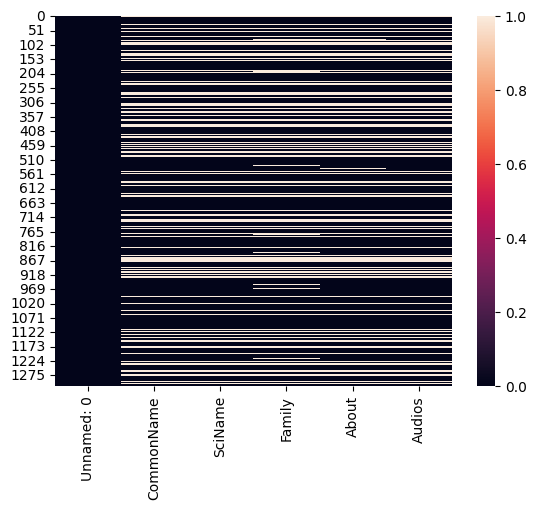

In [71]:
sns.heatmap(df.isnull())

Number of null values

In [34]:
df.isnull().sum()

Unnamed: 0      0
CommonName    358
SciName       358
Family        383
About         363
Audios        358
dtype: int64

while storing the scrapped data as csv , I did not kept index=False , so now I dropped the default unnamed

In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True)

While Scrapping if I was getting redundant family I stored it as "Family"

In [36]:
df['Family'].value_counts()

Family
Muscicapidae      69
Family            51
Leiothrichidae    43
Phasianidae       32
Phylloscopidae    29
                  ..
Hypocoliidae       1
Haematopodidae     1
Rostratulidae      1
Troglodytidae      1
Indicatoridae      1
Name: count, Length: 98, dtype: int64

Dropping the first two empty rows

In [37]:
df.drop([0,1],inplace=True)

dropping rows with more than 4 nan values

In [38]:
df.dropna(axis=0 , thresh=4, inplace=True)

In [10]:
df

,CommonName,SciName,Family,About,Audios
2,Abbott's babbler,Malacocincla abbotti,Pellorneidae,Abbott's babbler is a species of bird in the f...,https://xeno-canto.org/426677/download
3,Aberrant bush warbler,Horornis flavolivacea,Cettiidae,The aberrant bush warbler is a species in the ...,https://xeno-canto.org/312288/download
4,Alpine accentor,Prunella collaris,Prunellidae,The alpine accentor is a small passerine bird ...,https://xeno-canto.org/547442/download
5,Alpine chough,Pyrrhocorax graculus,Corvidae,"The Alpine chough, or yellow-billed chough, is...",https://xeno-canto.org/157362/download
6,Alpine swift,Tachymarptis melba,Apodidae,"The Alpine swift formerly Apus melba, is a spe...",https://xeno-canto.org/138660/download
...,...,...,...,...,...
1305,Yellow-vented flowerpecker,Dicaeum chrysorrheum,Dicaeidae,The yellow-vented flowerpecker is a species of...,https://xeno-canto.org/658782/download
1306,Yellow-vented warbler,Phylloscopus cantator,Phylloscopidae,The yellow-vented warbler is a species of leaf...,https://xeno-canto.org/551314/download
1307,Yellow-wattled lapwing,Vanellus malabaricus,Charadriidae,The yellow-wattled lapwing is a lapwing that i...,https://xeno-canto.org/481885/download
1309,Yunnan nuthatch,Sitta yunnanensis,Sittidae,The Yunnan nuthatch is a species of nuthatch e...,https://xeno-canto.org/549686/download


In [39]:
df.reset_index(inplace=True)

if family = "Family" (issued arised due to setting during scrapping) , or null values in other columns making it not found 

In [40]:
df.loc[df['Family'] == 'Family', 'Family'] = 'Family Not Found'
df.loc[df['Family'].isnull(), 'Family'] = 'Family Not Found'
df.loc[df['About'].isnull(), 'About'] = 'About Not Found'

Checking is out df is void of null values

<Axes: >

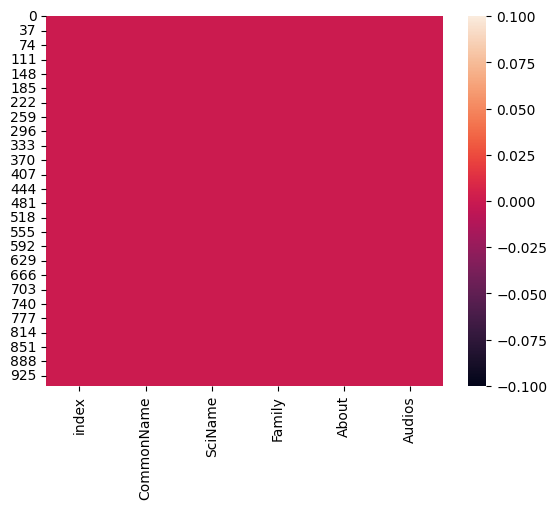

In [15]:
sns.heatmap(df.isnull())

In [41]:
df.drop(columns=['index'],inplace=True)

following the link in Audio column and saving it as .mp3 format in sounds , I ran it once and it worked by mistake when I ran it again I had to interrupt it to avoid making of sounds dir again

In [24]:
directory = 'sounds'
os.makedirs(directory, exist_ok=True)
for index, row in df.iterrows():
    file_name = row['CommonName'] + '.mp3'
    url = row['Audios']
    response = requests.get(url)
    file_path = os.path.join(directory, file_name)
    with open(file_path, "wb") as file:
        file.write(response.content)




KeyboardInterrupt: 

using IPython.display.Audio to listen to .mp3 , had to set rate generally taken as 44kHz

In [35]:
audio_path = "./sounds/Abbott's babbler.mp3"
audio = Audio(audio_path , rate=44000)
display(audio)



importing the necessary libraries

follow the comments for further explanation

In [56]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

labels = df['CommonName'].tolist()       #making a list of commonnames 
audiofiles=[]       
features = []
for i in os.listdir('sounds'):
     if i not in ['test.mp3', 'test2.mp3', 'test3.mp3', 'test4.mp3']:    # test and  rest are files manually saved by me to test to avoiding them to train 
         audiofiles.append(i) 
for j in audiofiles:
    filepath = os.path.join('sounds', j)        #making filepath using os 
    t, sr = librosa.load(filepath, sr=None)      # conversion of audio in array # t arrayof amplitudes at diff time # sr is sample rate
    mfccs = librosa.feature.mfcc(y=t, sr=sr, n_mfcc=13) #mfccs is 2d array each row corresponds to mffc , each col to diff time frames
    mfccs_scaled = np.mean(mfccs.T, axis=0)  #scaling
    features.append(mfccs_scaled)  
x = np.array(features)  #conv to nd array 
y = np.array(labels)
l = LabelEncoder()   # encode the labels to num from 0 to n-1
y = l.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #split the data #funfact : 42 is used in practice as it is denoted as answer to universal mystery
scaler = StandardScaler()   #normalise
x_train = scaler.fit_transform(x_train)  #transform
x_test = scaler.transform(x_test)
clf = SVC()  # using model svc
clf.fit(x_train, y_train)
test_audio_path = "./sounds/Blue-tailed bee-eater.mp3"  #forming path
t, sr = librosa.load(test_audio_path, sr=None) # note these steps are repeated to test 
mfccs = librosa.feature.mfcc(y=t, sr=sr, n_mfcc=13)
mfccs_scaled = np.mean(mfccs.T, axis=0)
features_scaled = scaler.transform([mfccs_scaled])
prediction = clf.predict(features_scaled)
bird= l.inverse_transform(prediction) # converting transformed numerical label to original names

print("Predicted Bird Species:", bird[0]) # give the commonname corresponding col 0


Predicted Bird Species: Blue-tailed bee-eater


In [60]:
test_audio_path = "./sounds/Andaman nightjar.mp3"
t, sr = librosa.load(test_audio_path, sr=None)    #notice the repeatitiveness 
mfccs = librosa.feature.mfcc(y=t, sr=sr, n_mfcc=13)
mfccs_scaled = np.mean(mfccs.T, axis=0)
features_scaled = scaler.transform([mfccs_scaled])
prediction = clf.predict(features_scaled)
bird= l.inverse_transform(prediction)

print("Predicted Bird Species:", bird[0])


Predicted Bird Species: Andaman nightjar


we made the crude code now make it a little resuable (note it does the same task as previous just more refined code it has)

In [64]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
labels = df['CommonName'].tolist()
audiofiles=[]
features = []
def feature(j):
    filepath = os.path.join('sounds', j)    #formed fuction of the repeatitive code
    t, sr = librosa.load(filepath, sr=None)
    mfccs = librosa.feature.mfcc(y=t, sr=sr, n_mfcc=13)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled 
for i in os.listdir('sounds'):
     if i not in ['test.mp3', 'test2.mp3', 'test3.mp3', 'test4.mp3']:
         audiofiles.append(i) 
for j in audiofiles:
    mfccs_scaled = feature(j)
    features.append(mfccs_scaled)
x = np.array(features)
y = np.array(labels)
l = LabelEncoder()
y = l.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
clf = SVC()
clf.fit(x_train, y_train)

test_audio_path = "Blue-tailed bee-eater.mp3"
mfccs_scaled = feature(test_audio_path)
features_scaled = scaler.transform([mfccs_scaled])
prediction = clf.predict(features_scaled)
bird= l.inverse_transform(prediction)

print("Predicted Bird Species:", bird[0])


Predicted Bird Species: Blue-tailed bee-eater


In [65]:
test_audio_path = "test4.mp3"
mfccs_scaled = feature(test_audio_path)  
features_scaled = scaler.transform([mfccs_scaled])
prediction = clf.predict(features_scaled)
bird= l.inverse_transform(prediction)

print("Predicted Bird Species:", bird[0])

Predicted Bird Species: Red-billed chough


saving model , label encoder and scaler as pkl files

In [66]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(l, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


making a csv of cleaned data and storing

In [69]:
df.to_csv('cleaned_data.csv')